# Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Initial Data Exploration and Missing Data Visualization

In [2]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

---- DataFrame Information ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  flo

<Figure size 1000x600 with 0 Axes>

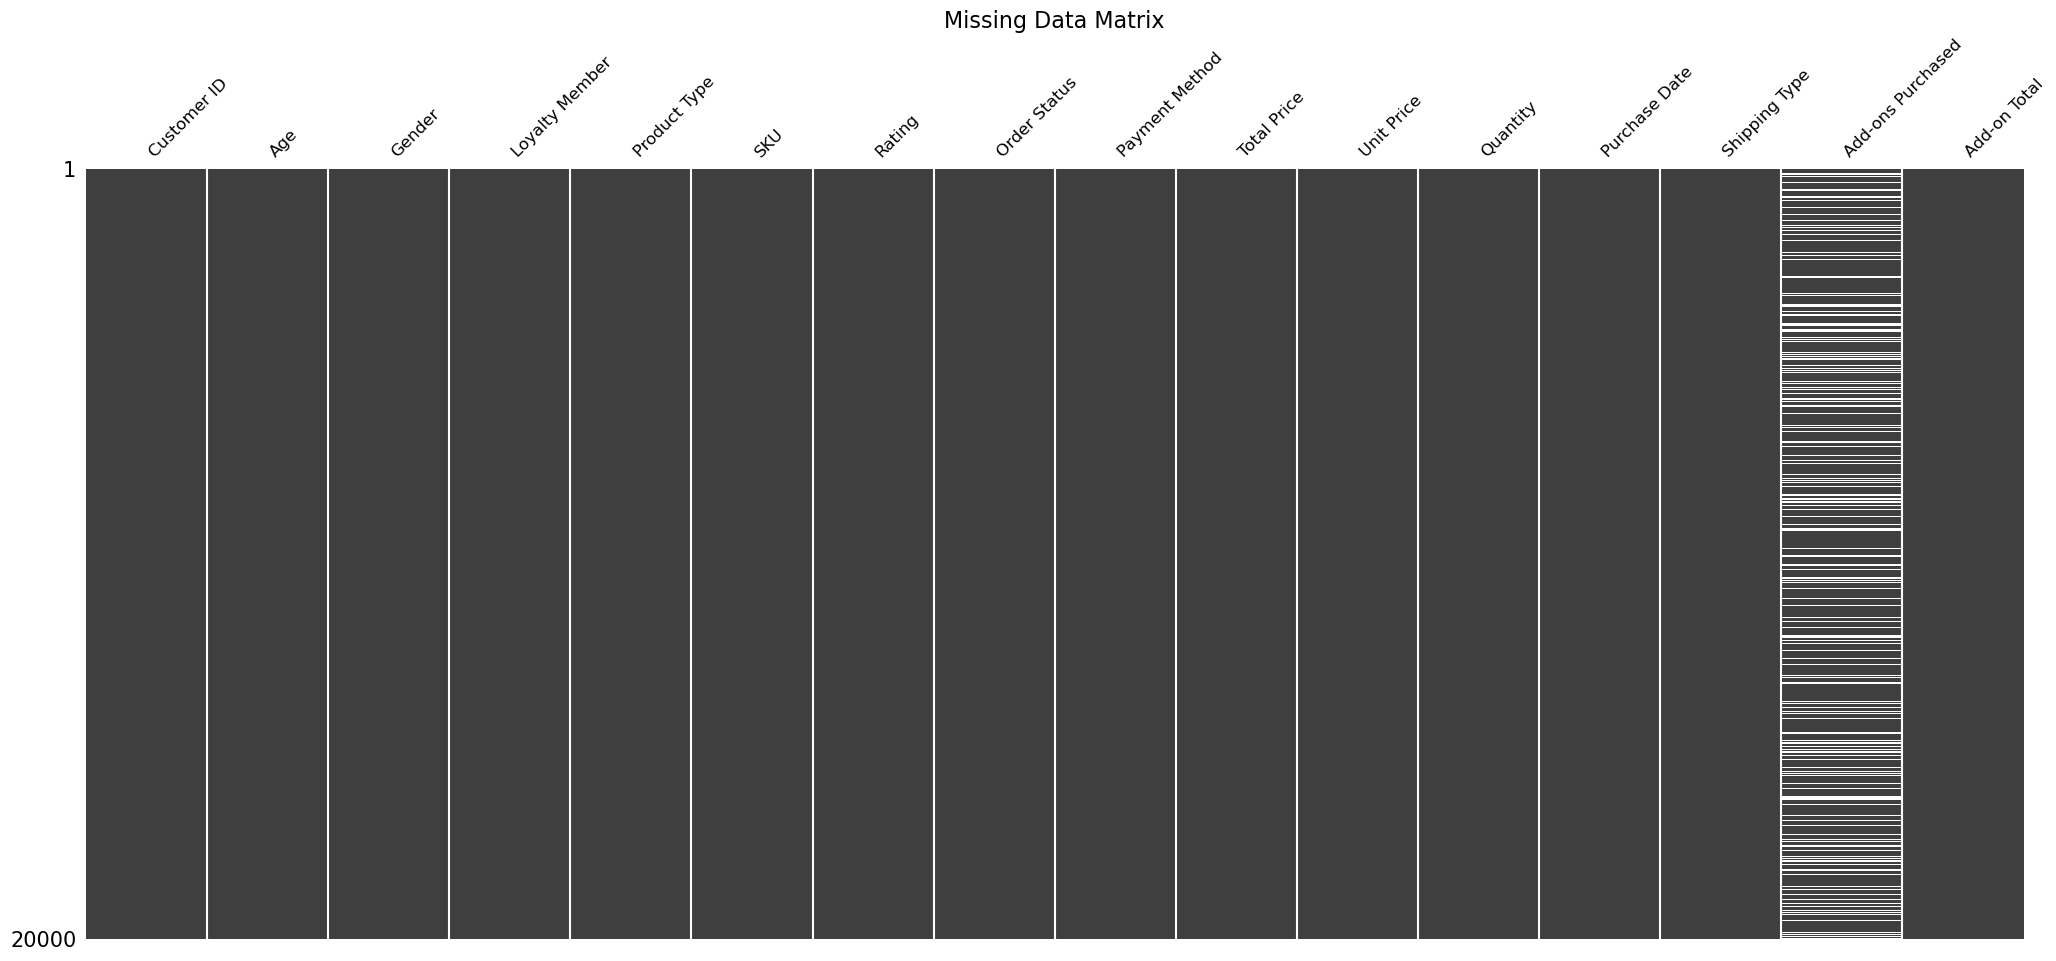

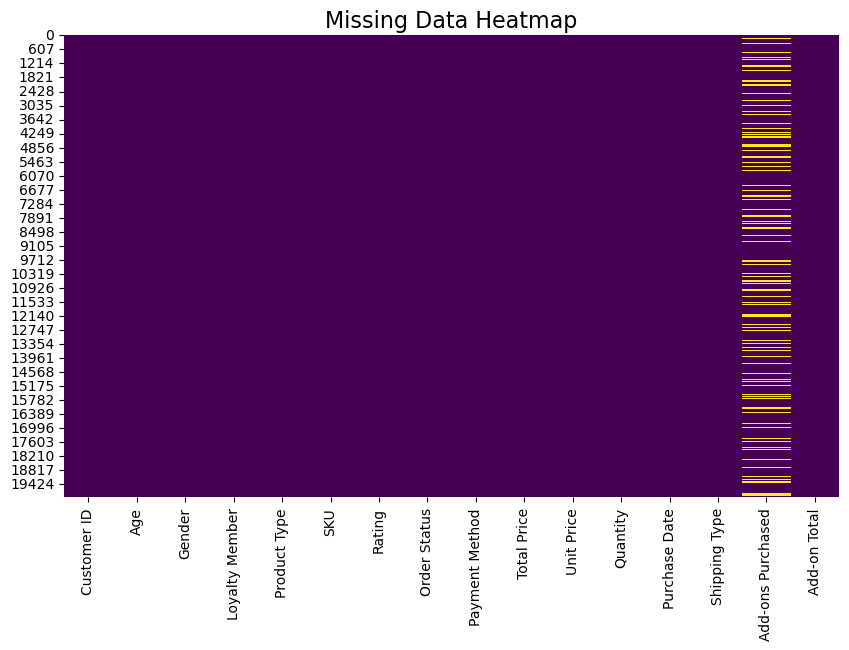


---- Descriptive Statistics ----
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75

In [5]:
# Displaying DataFrame information
print("---- DataFrame Information ----")
df.info()

# Summarizing missing values
print("\n---- Missing Values Summary ----")
missing_values = df.isnull().sum()
print(missing_values)

# Displaying first few rows of the dataset for quick inspection
print("\n---- First 5 Rows of the DataFrame ----")
print(df.head())

# Plotting missing data matrix with missingno for visual inspection
print("\n---- Visualizing Missing Data ----")
plt.figure(figsize=(10, 6))  # Set a larger figure size for better clarity
msno.matrix(df, fontsize=12, sparkline=False)
plt.title('Missing Data Matrix', fontsize=16)
plt.show()

# Optional: Additional visualization of missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap', fontsize=16)
plt.show()

# Descriptive statistics to understand the numerical features
print("\n---- Descriptive Statistics ----")
print(df.describe())


# Data Cleaning and Handling Missing Values

In [6]:
# Handling missing values for 'Add-ons Purchased' by replacing NaN with 'None'
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna('None')

# Handling missing values for 'Gender' by replacing NaN with the most frequent value (mode)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Converting 'Purchase Date' column to datetime format for better analysis
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Verifying that the cleaning steps were applied successfully
print("\n---- Missing Values After Cleaning ----")
print(df.isnull().sum())



---- Missing Values After Cleaning ----
Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64


Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64


<Axes: >

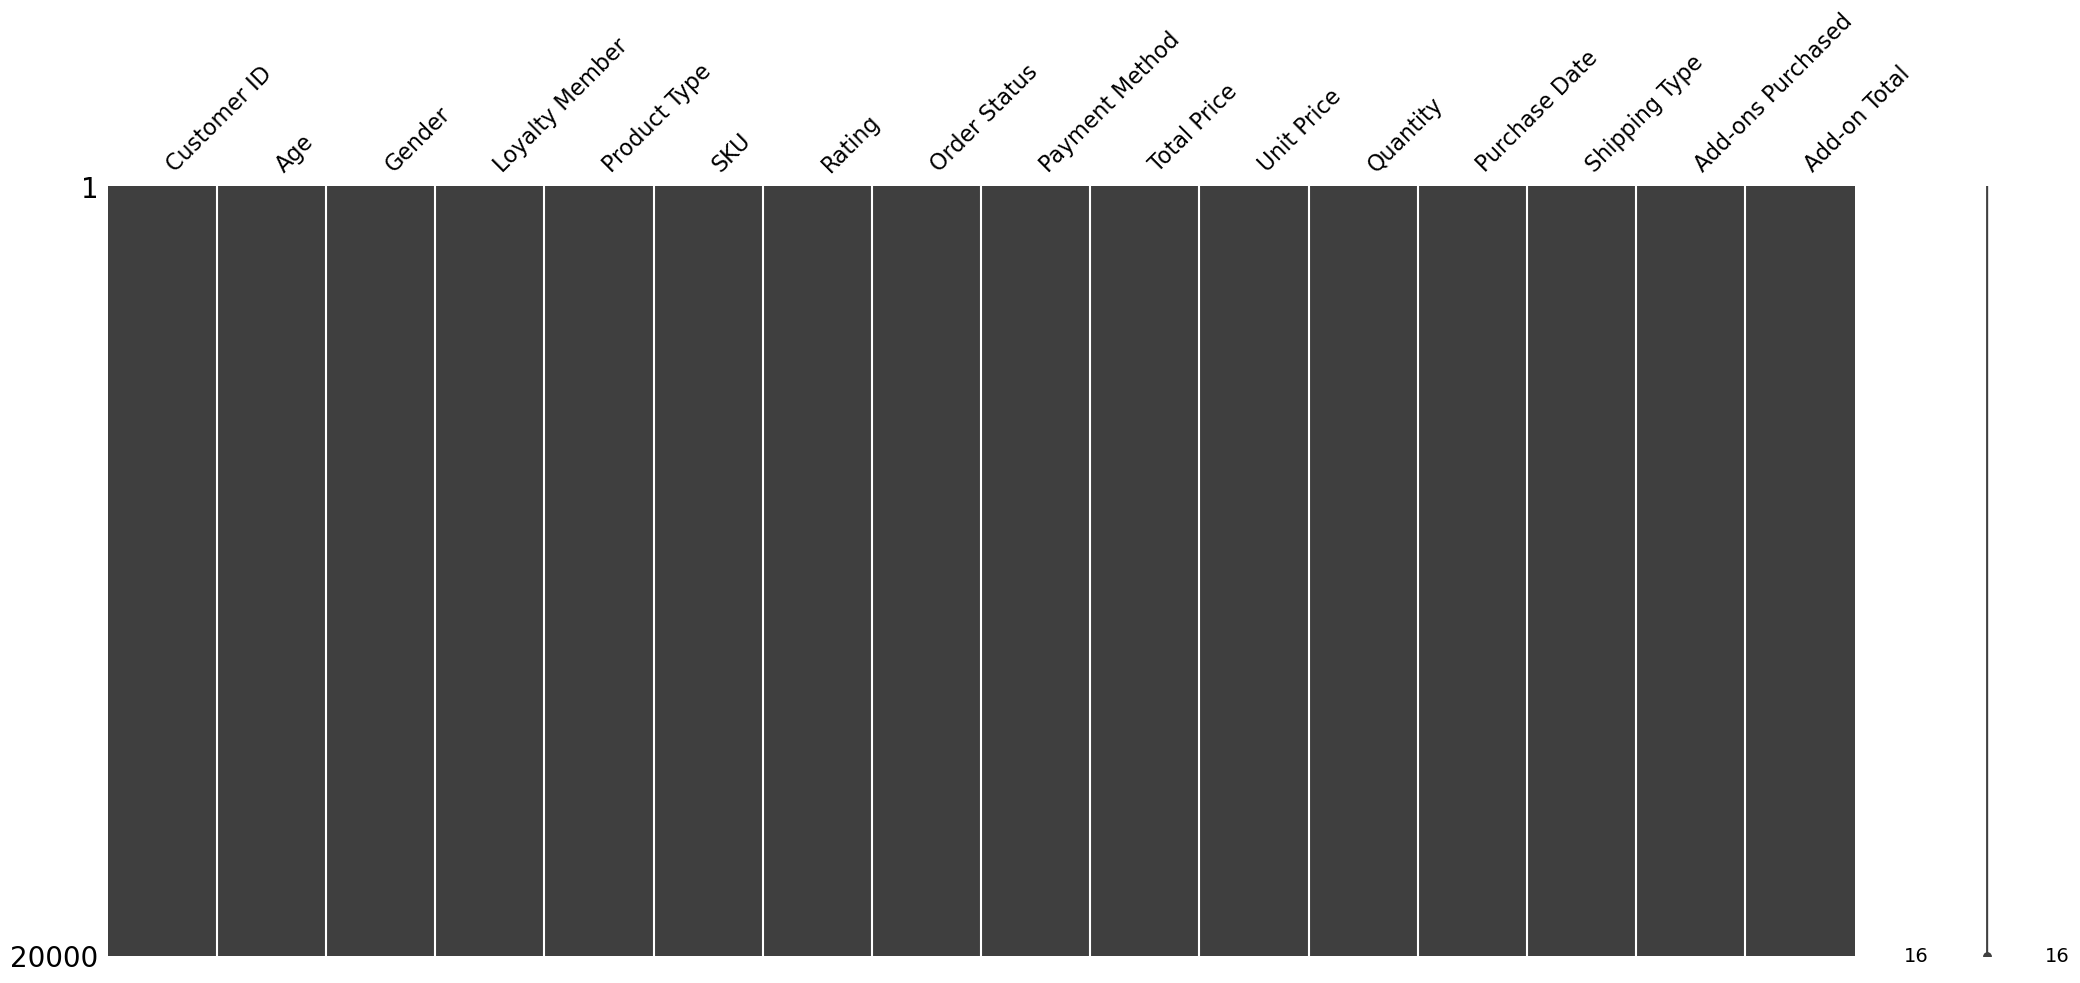

In [8]:
print(df.isnull().sum())
msno.matrix(df)

# EDA

In [9]:
print(df.describe())

        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   

           Quantity                  Purchase Date  Add-on Total  
count  20000.000000                          20000  20000.000000  
mean       5.485550  2024-04-18 10:42:18.720000256     62.244848  
min        1.000000            2023-09-24 00:00:00      0.000000  
25%        3.000000 

# Univariate Analysis

# Visualizing the Age Distribution of Customers

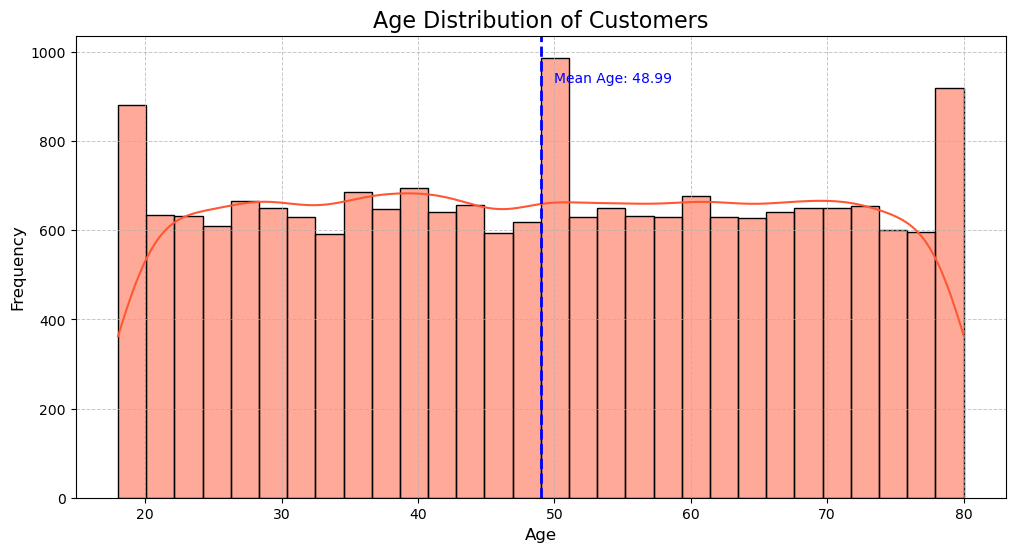

In [10]:
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
sns.histplot(df['Age'], bins=30, kde=True, color="#FF5733")  # Create histogram with KDE

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Annotating the mean age on the plot
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='blue', linestyle='--', linewidth=2)
plt.text(mean_age+1, plt.ylim()[1]*0.9, f'Mean Age: {mean_age:.2f}', color='blue')

plt.title('Age Distribution of Customers', fontsize=16)  # Title with larger font size
plt.xlabel('Age', fontsize=12)  # X-axis label
plt.ylabel('Frequency', fontsize=12)  # Y-axis label
plt.show()  # Display the plot


# Visualizing the Gender Distribution of Customers

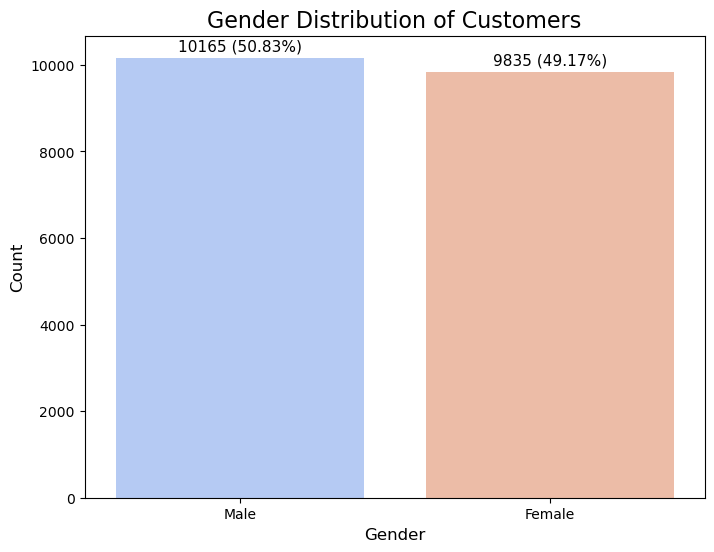

In [13]:
plt.figure(figsize=(8, 6))  # Set figure size

# Create count plot with 'Gender' on X-axis using the 'coolwarm' palette
ax = sns.countplot(x='Gender', data=df, palette='coolwarm')

# Adding title and axis labels with larger font size
plt.title('Gender Distribution of Customers', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotating the count and percentage on top of each bar, ensuring counts are integers
total = len(df)  # Total number of customers
for p in ax.patches:
    count = int(p.get_height())  # Convert float count to integer
    percentage = f'{100 * p.get_height() / total:.2f}%'  # Calculate percentage
    ax.annotate(f'{count} ({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Display the plot
plt.show()


# Visualizing the Loyalty Member Distribution

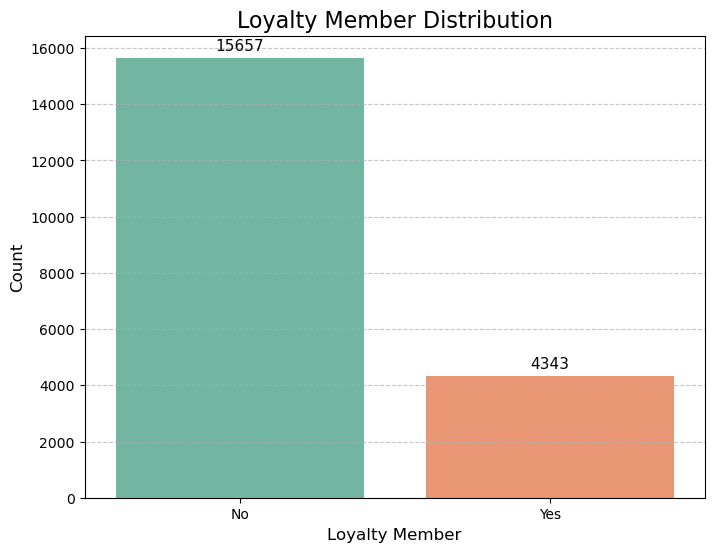

In [16]:
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Create count plot with 'Loyalty Member' on X-axis using a different color palette 'Set2'
ax = sns.countplot(x='Loyalty Member', data=df, palette='Set2')

# Adding title and axis labels with larger font size
plt.title('Loyalty Member Distribution', fontsize=16)
plt.xlabel('Loyalty Member', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotating the count on top of each bar, ensuring counts are integers
total = len(df)  # Total number of customers
for p in ax.patches:
    count = int(p.get_height())  # Convert float count to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Sales Distribution by Product Type

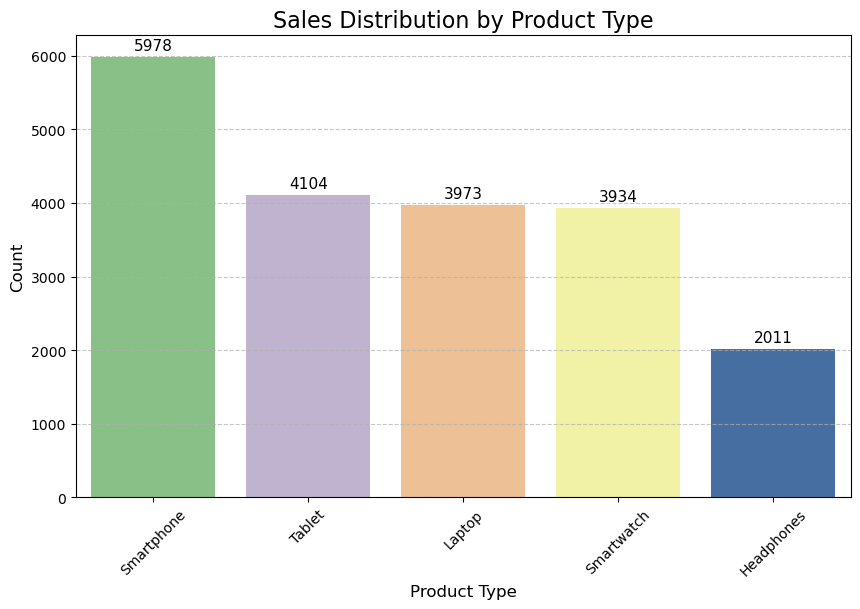

In [17]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Create count plot with 'Product Type' on X-axis using a new color palette 'Accent'
ax = sns.countplot(x='Product Type', 
                   data=df, 
                   order=df['Product Type'].value_counts().index, 
                   palette='Accent')

# Adding title and axis labels with larger font size
plt.title('Sales Distribution by Product Type', fontsize=16)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Annotating the count on top of each bar, ensuring counts are integers
total = len(df)  # Total number of sales
for p in ax.patches:
    count = int(p.get_height())  # Convert float count to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Order Status Distribution

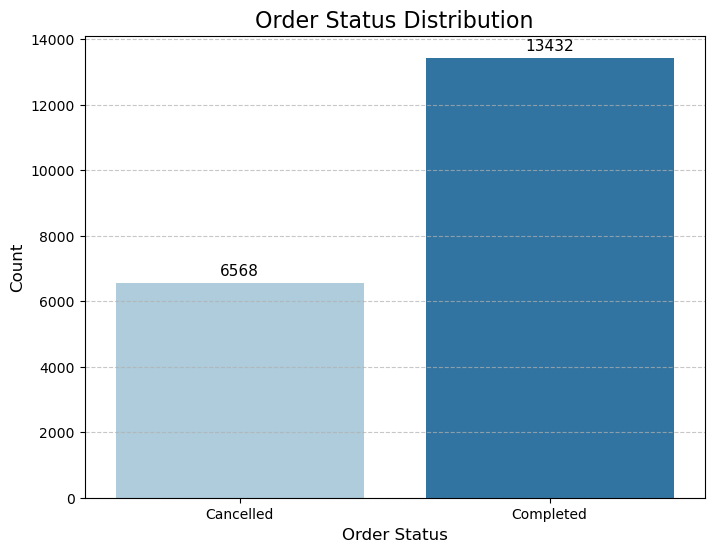

In [18]:
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Create count plot with 'Order Status' on X-axis using a new color palette 'Paired'
ax = sns.countplot(x='Order Status', data=df, palette='Paired')

# Adding title and axis labels with larger font size
plt.title('Order Status Distribution', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotating the count on top of each bar, ensuring counts are integers
total = len(df)  # Total number of orders
for p in ax.patches:
    count = int(p.get_height())  # Convert float count to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Distribution of Payment Methods

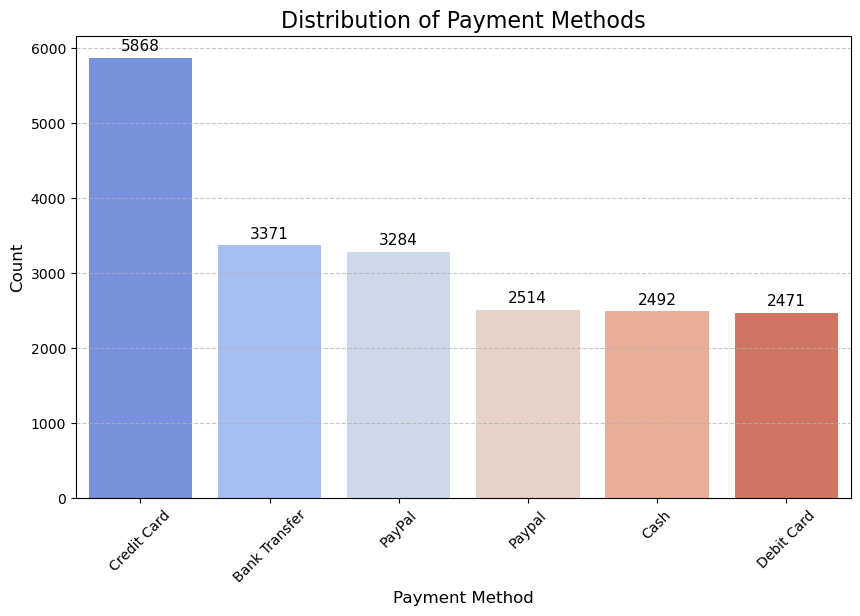

In [19]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Create count plot with 'Payment Method' on X-axis using a different color palette 'coolwarm'
ax = sns.countplot(x='Payment Method', 
                   data=df, 
                   order=df['Payment Method'].value_counts().index, 
                   palette='coolwarm')

# Adding title and axis labels with larger font size
plt.title('Distribution of Payment Methods', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Annotating the count on top of each bar, ensuring counts are integers
total = len(df)  # Total number of transactions
for p in ax.patches:
    count = int(p.get_height())  # Convert float count to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Distribution of Total Prices 

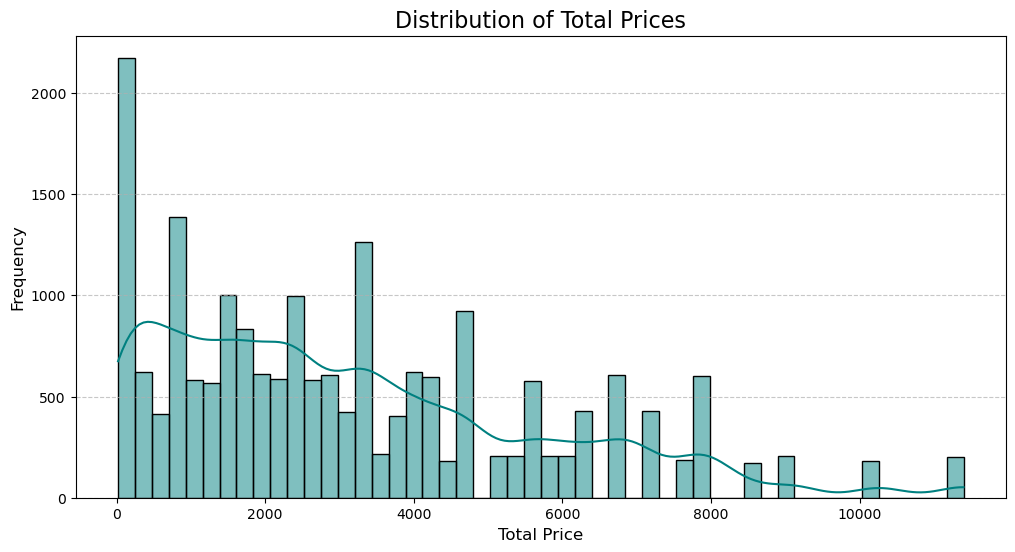

In [20]:
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Create a histogram with Kernel Density Estimate (KDE) for 'Total Price'
sns.histplot(df['Total Price'], 
             bins=50, 
             kde=True, 
             color='teal',  # Changed to a more attractive color
             edgecolor='black')  # Add edge color for better visibility of bars

# Adding title and axis labels with larger font size
plt.title('Distribution of Total Prices', fontsize=16)
plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Distribution of Unit Prices

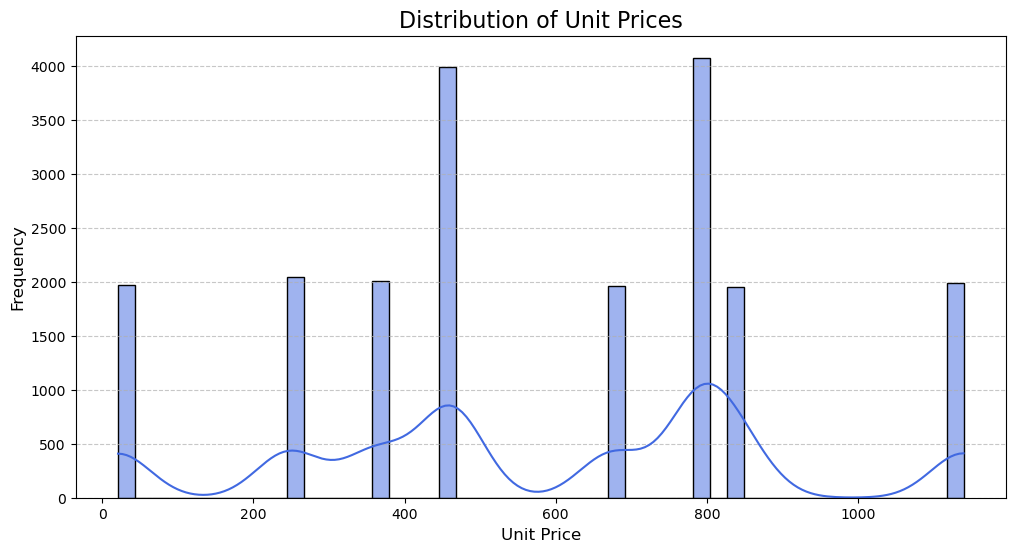

In [21]:
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Create a histogram with Kernel Density Estimate (KDE) for 'Unit Price'
sns.histplot(df['Unit Price'], 
             bins=50, 
             kde=True, 
             color='royalblue',  # Changed to a more attractive and distinct color
             edgecolor='black')  # Add edge color for better visibility of bars

# Adding title and axis labels with larger font size
plt.title('Distribution of Unit Prices', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Distribution of Quantity Purchased

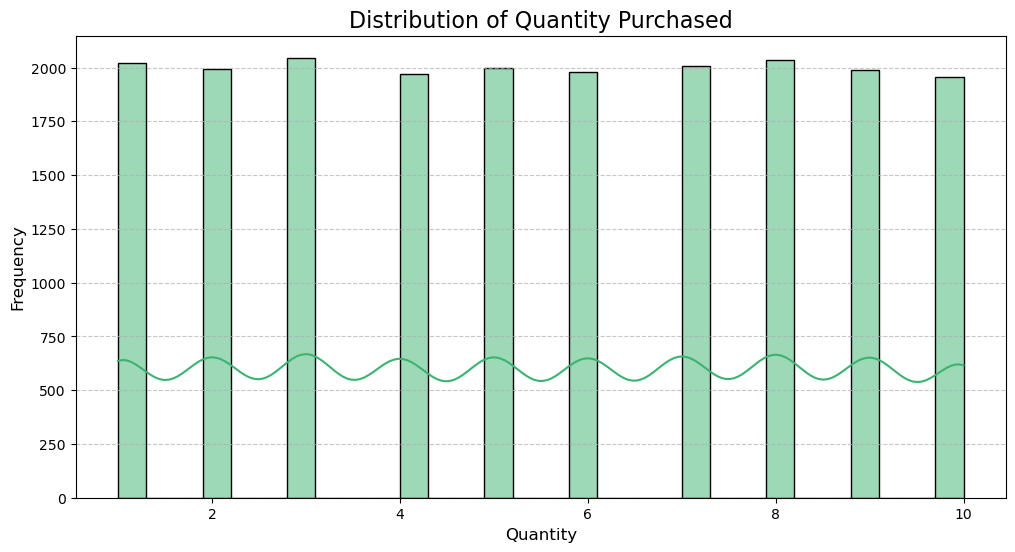

In [22]:
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Create a histogram with Kernel Density Estimate (KDE) for 'Quantity'
sns.histplot(df['Quantity'], 
             bins=30, 
             kde=True, 
             color='mediumseagreen',  # Changed to a more appealing and distinct color
             edgecolor='black')  # Add edge color for better visibility of bars

# Adding title and axis labels with larger font size
plt.title('Distribution of Quantity Purchased', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Distribution of Product Ratings

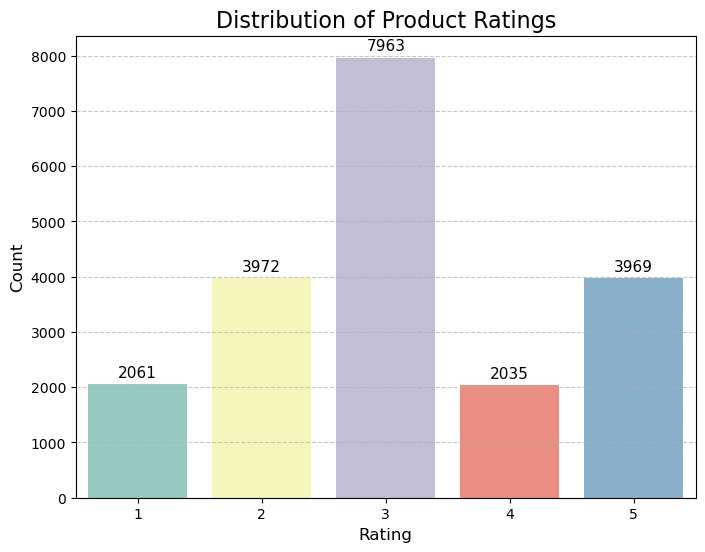

In [23]:
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Create count plot for 'Rating' using a new color palette
ax = sns.countplot(x='Rating', data=df, palette='Set3')

# Adding title and axis labels with larger font size
plt.title('Distribution of Product Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotating the count on top of each bar, ensuring counts are integers
for p in ax.patches:
    count = int(p.get_height())  # Convert float count to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Distribution of Shipping Types

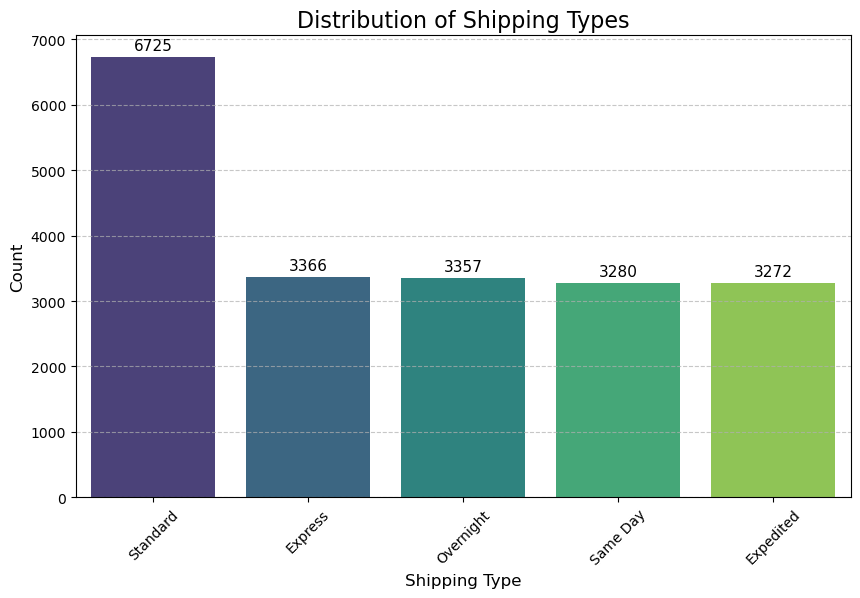

In [24]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Create count plot for 'Shipping Type' using a distinct color palette
ax = sns.countplot(x='Shipping Type', 
                   data=df, 
                   order=df['Shipping Type'].value_counts().index, 
                   palette='viridis')  # Changed to a more appealing color palette

# Adding title and axis labels with larger font size
plt.title('Distribution of Shipping Types', fontsize=16)
plt.xlabel('Shipping Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotating the count on top of each bar, ensuring counts are integers
for p in ax.patches:
    count = int(p.get_height())  # Convert float count to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Visualizing Top 10 Add-ons Purchased

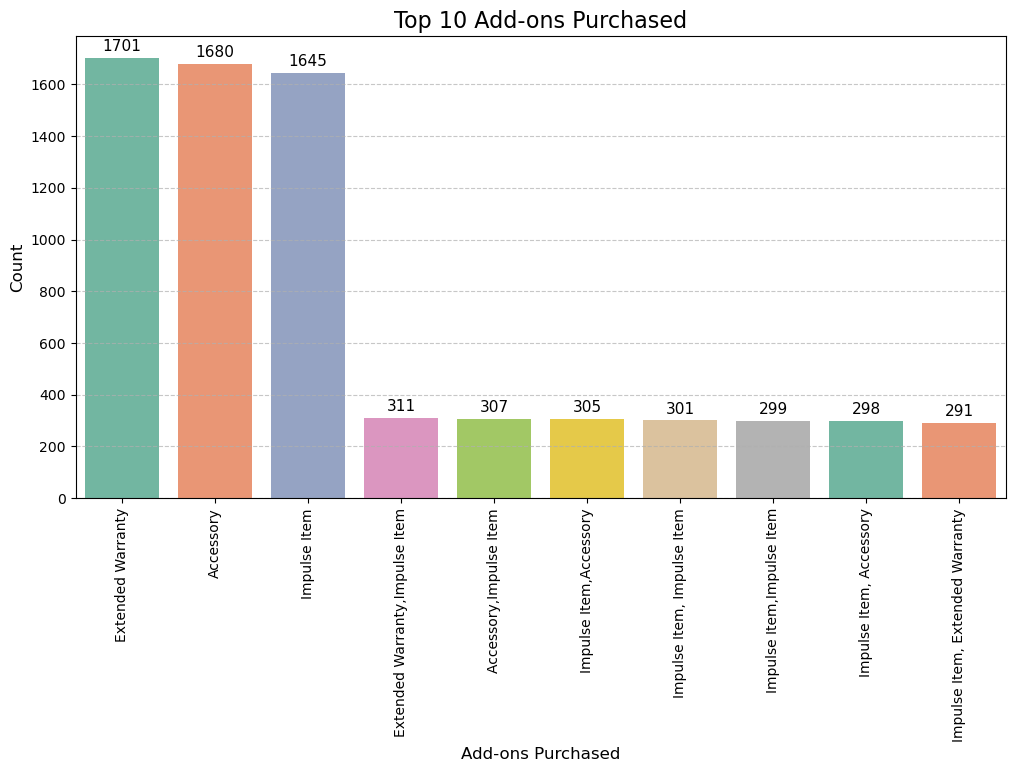

In [25]:
# Filter out rows where 'Add-ons Purchased' is 'None'
add_ons_filtered = df[df['Add-ons Purchased'] != 'None']

plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Create count plot for top 10 'Add-ons Purchased'
ax = sns.countplot(x='Add-ons Purchased', 
                   data=add_ons_filtered, 
                   order=add_ons_filtered['Add-ons Purchased'].value_counts().index[:10], 
                   palette='Set2')  # Changed to a distinct color palette

# Adding title and axis labels with larger font size
plt.title('Top 10 Add-ons Purchased', fontsize=16)
plt.xlabel('Add-ons Purchased', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotating the count on top of each bar, ensuring counts are integers
for p in ax.patches:
    count = int(p.get_height())  # Convert float count to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate X-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Bivariate Analysis

# Visualizing Age vs. Total Price by Gender

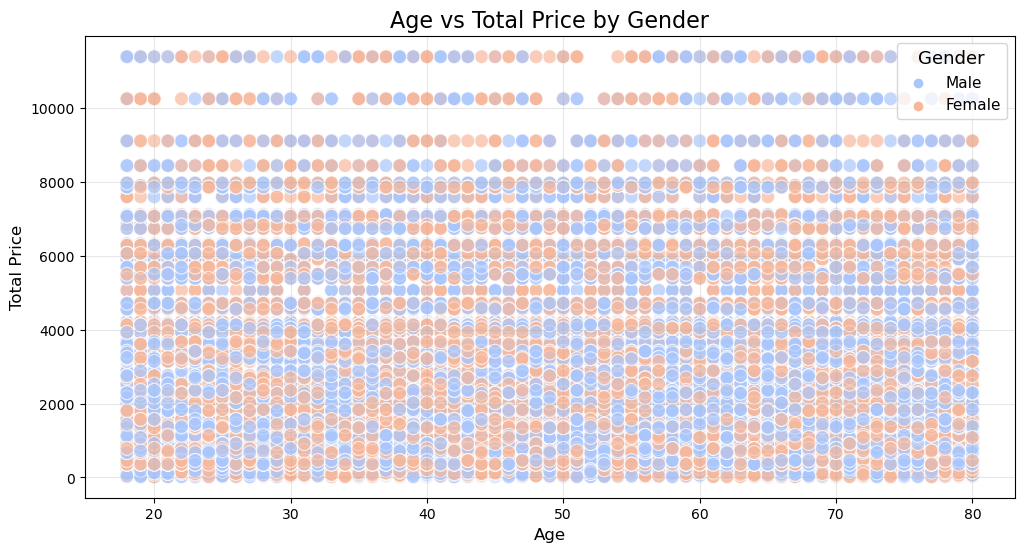

In [26]:
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Create scatter plot for Age vs. Total Price, colored by Gender
ax = sns.scatterplot(x='Age', 
                     y='Total Price', 
                     data=df, 
                     hue='Gender', 
                     palette='coolwarm',  # Changed to a visually appealing color palette
                     alpha=0.7,           # Slightly increased alpha for better visibility
                     edgecolor='w',       # Added white edges for better separation of points
                     s=100)               # Increased marker size for better visibility

# Adding title and axis labels with larger font size
plt.title('Age vs Total Price by Gender', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Price', fontsize=12)

# Adding a legend with a title
plt.legend(title='Gender', title_fontsize='13', fontsize='11')

# Adding gridlines for better readability
plt.grid(alpha=0.3)

# Display the plot
plt.show()


# Visualizing Total Price Distribution by Loyalty Member Status

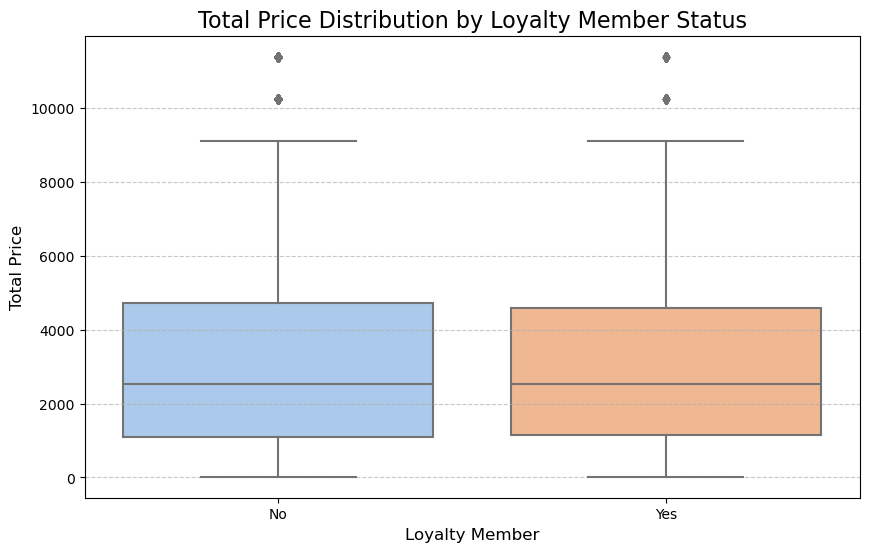

In [27]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Create a box plot for Total Price by Loyalty Member Status
ax = sns.boxplot(x='Loyalty Member', 
                 y='Total Price', 
                 data=df, 
                 palette='pastel')  # Changed to a more visually appealing palette

# Adding title and axis labels with larger font size
plt.title('Total Price Distribution by Loyalty Member Status', fontsize=16)
plt.xlabel('Loyalty Member', fontsize=12)
plt.ylabel('Total Price', fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Total Price Distribution by Product Type

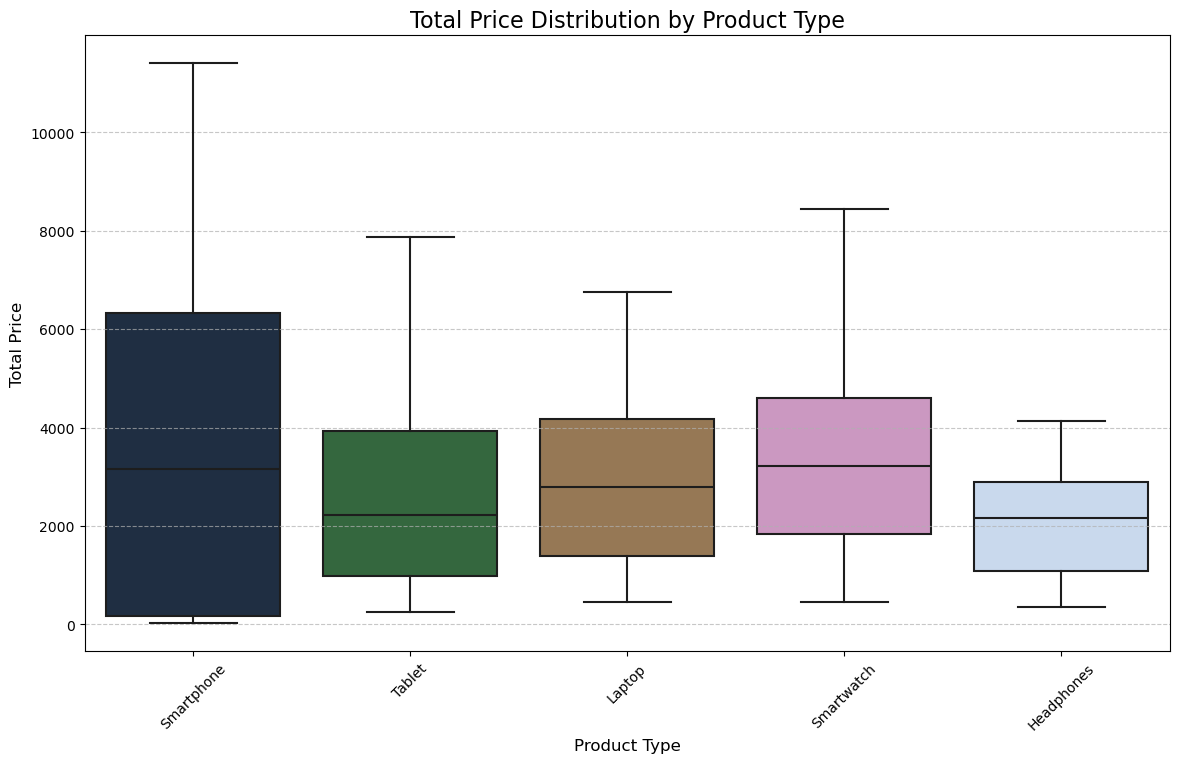

In [28]:
plt.figure(figsize=(14, 8))  # Set figure size for better visibility

# Create a box plot for Total Price by Product Type
ax = sns.boxplot(x='Product Type', 
                 y='Total Price', 
                 data=df, 
                 palette='cubehelix')  # Changed to a distinct color palette

# Adding title and axis labels with larger font size
plt.title('Total Price Distribution by Product Type', fontsize=16)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Total Price', fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Visualizing Total Price Distribution by Payment Method

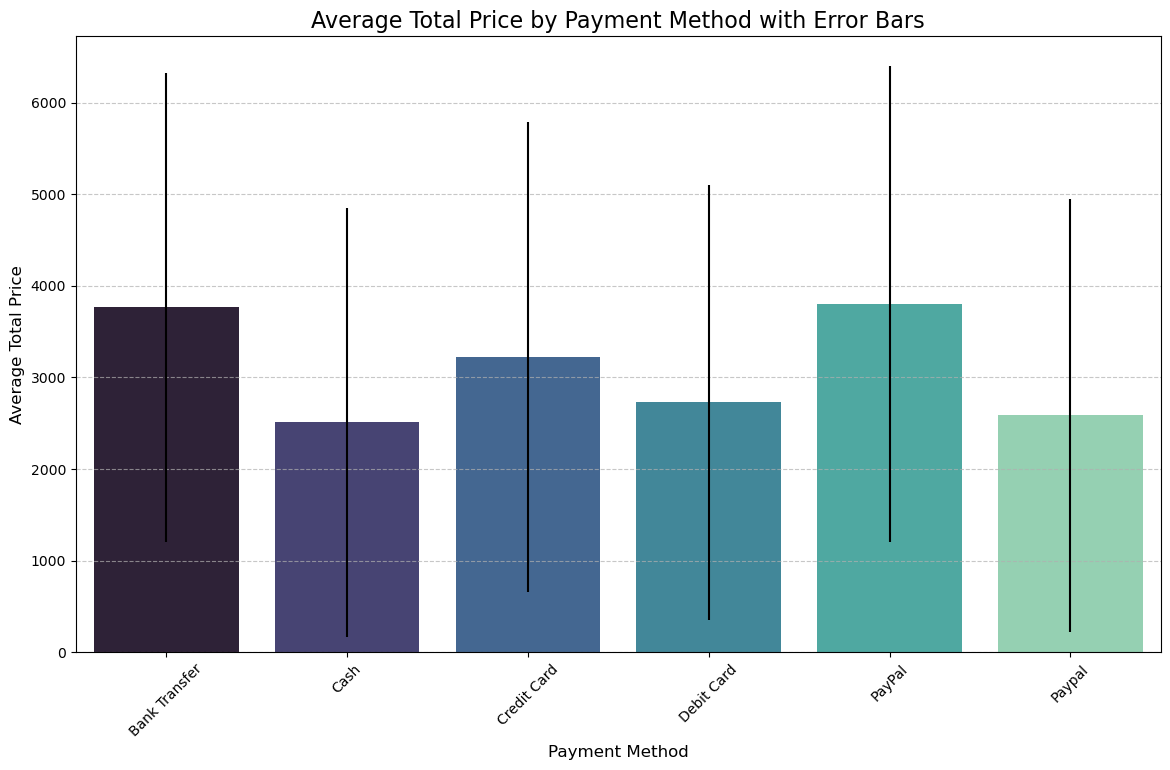

In [31]:
# Calculate the mean and standard deviation of Total Price by Payment Method
bar_data = df.groupby('Payment Method')['Total Price'].agg(['mean', 'std', 'count']).reset_index()

# Set figure size
plt.figure(figsize=(14, 8))

# Create a bar plot with error bars
sns.barplot(x='Payment Method', 
            y='mean', 
            data=bar_data, 
            palette='mako',  # A new distinct color palette
            yerr=bar_data['std'],  # Error bars as standard deviation
            capsize=0.2)  # Adding caps to the error bars for better visibility

# Adding title and axis labels with larger font size
plt.title('Average Total Price by Payment Method with Error Bars', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Average Total Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Visualizing Total Price Distribution by Product Rating

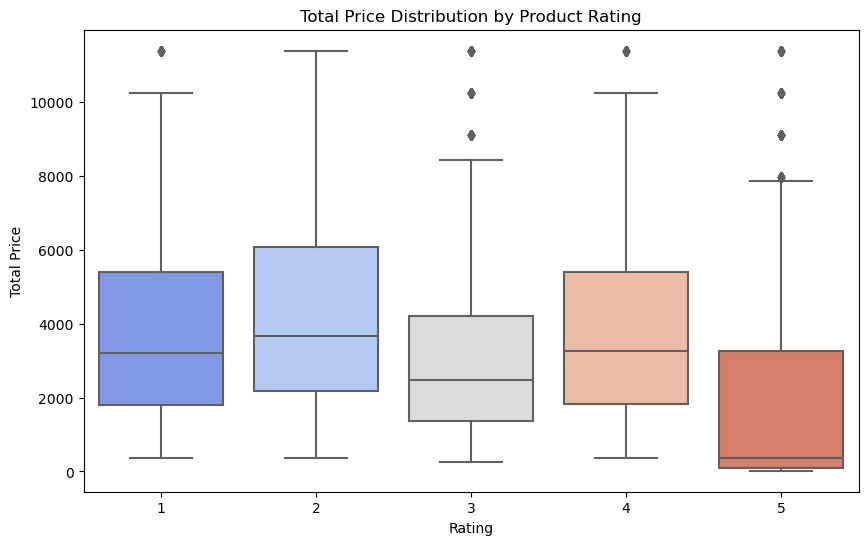

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Total Price', data=df, palette='coolwarm')
plt.title('Total Price Distribution by Product Rating')
plt.xlabel('Rating')
plt.ylabel('Total Price')
plt.show()

# Analyzing Total Price Distribution Based on Shipping Type

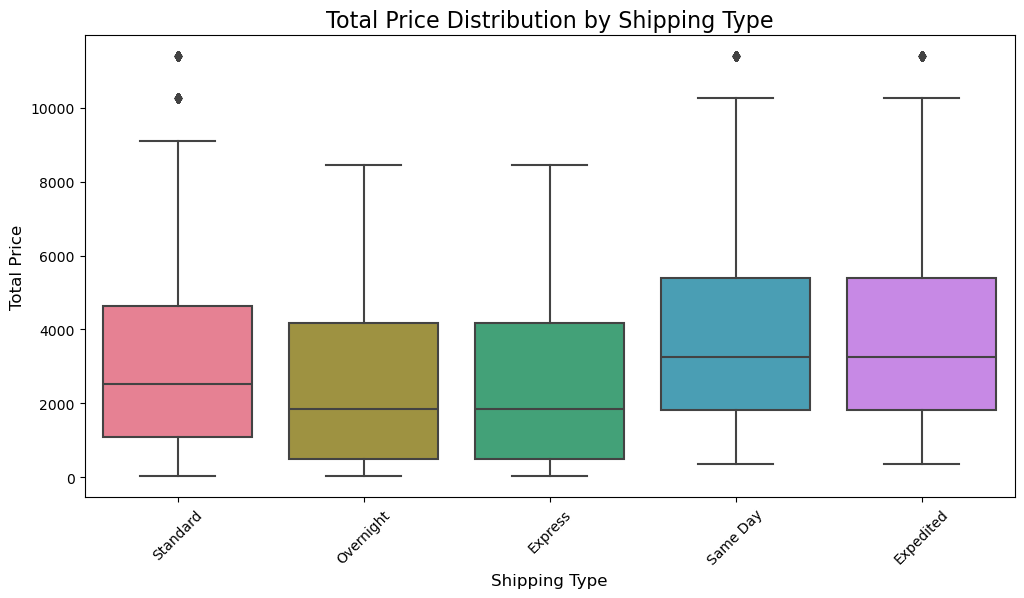

In [34]:
plt.figure(figsize=(12, 6))  # Set figure size for better visibility

# Create a box plot for Total Price by Shipping Type
sns.boxplot(x='Shipping Type', y='Total Price', data=df, palette='husl')

# Adding title and axis labels with larger font size
plt.title('Total Price Distribution by Shipping Type', fontsize=16)
plt.xlabel('Shipping Type', fontsize=12)
plt.ylabel('Total Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Examining Relationships Between Numerical Features Through Correlation Matrix

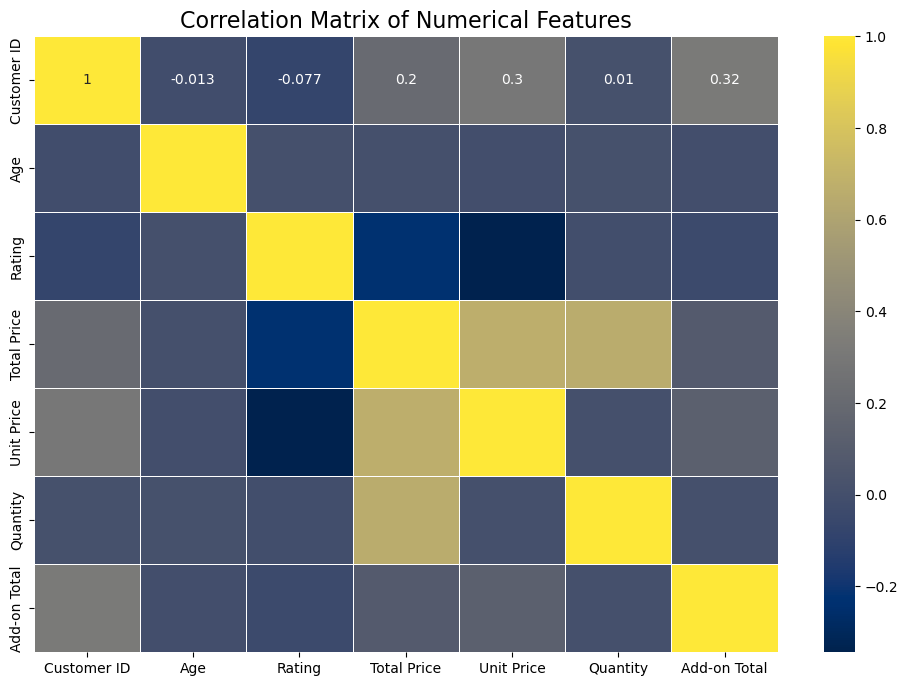

In [37]:
# Select only numerical columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))  # Set figure size for better visibility

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=0.5)

# Adding title for the heatmap
plt.title('Correlation Matrix of Numerical Features', fontsize=16)

# Display the heatmap
plt.show()


# Analyzing Age Distribution Across Genders

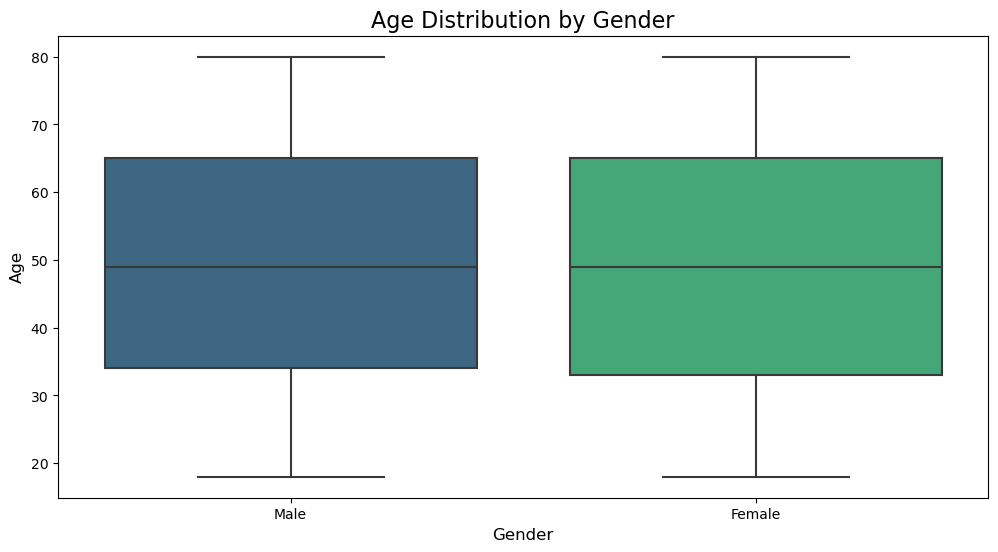

In [38]:
plt.figure(figsize=(12, 6))  # Set figure size for better visibility

# Create a box plot for Age distribution by Gender
sns.boxplot(x='Gender', y='Age', data=df, palette='viridis')

# Adding title and axis labels with larger font size
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Display the plot
plt.show()


# Analyzing Total Price Distribution Based on Add-ons Purchased

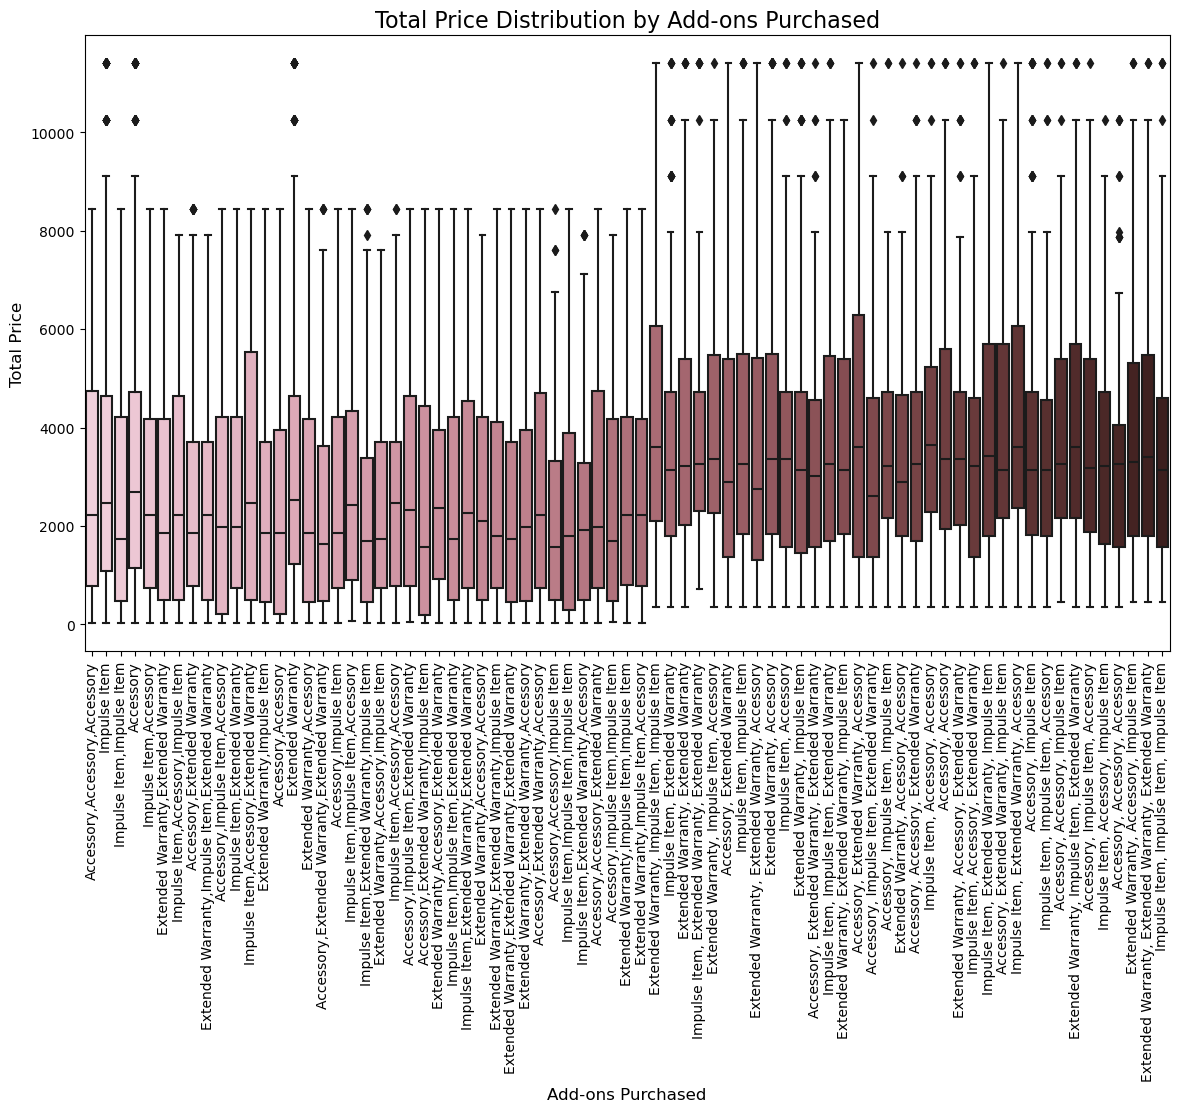

In [39]:
plt.figure(figsize=(14, 8))  # Set figure size for better visibility

# Create a box plot for Total Price distribution by Add-ons Purchased
sns.boxplot(x='Add-ons Purchased', y='Total Price', data=df[df['Add-ons Purchased'] != 'None'], 
            palette='ch:s=1,r=-.1,h=1')

# Adding title and axis labels with larger font size
plt.title('Total Price Distribution by Add-ons Purchased', fontsize=16)
plt.xlabel('Add-ons Purchased', fontsize=12)
plt.ylabel('Total Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Analyzing Monthly Total Sales Trends

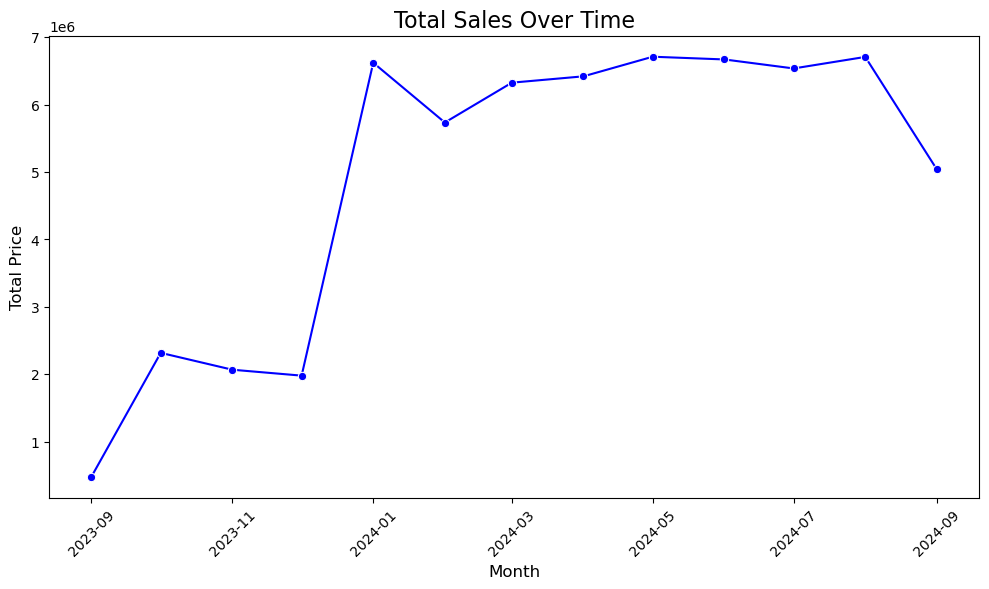

In [40]:
# Convert 'Purchase Date' to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Create a 'YearMonth' column for monthly aggregation
df['YearMonth'] = df['Purchase Date'].dt.to_period('M')

# Group by 'YearMonth' and sum 'Total Price' to get monthly sales
monthly_sales = df.groupby('YearMonth')['Total Price'].sum().reset_index()

# Convert 'YearMonth' back to timestamp for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Create a line plot for Total Sales over time
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
sns.lineplot(x='YearMonth', y='Total Price', data=monthly_sales, marker='o', color='b')

# Adding title and axis labels with larger font size
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()
